# Industry Project Yelp; Keyword - Speed of service or checkout

**Import and load data and libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("./Yelp Restaurant Reviews.csv")

In [3]:
df

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


Convert Date column into datetime

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df["Year_Month"] = df["Date"].dt.to_period('M')

In [7]:
df["Year"] = df["Date"].dt.year

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Yelp URL     19896 non-null  object        
 1   Rating       19896 non-null  int64         
 2   Date         19896 non-null  datetime64[ns]
 3   Review Text  19896 non-null  object        
 4   Year_Month   19896 non-null  period[M]     
 5   Year         19896 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2), period[M](1)
memory usage: 932.8+ KB


<AxesSubplot: xlabel='Rating'>

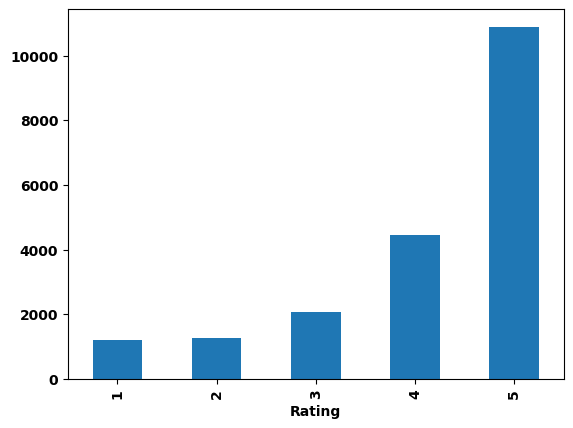

In [9]:
df.groupby("Rating")["Rating"].count().plot(kind="bar")

Keywords can be in various forms, such as "wait", "wating", "waited" and so on. So I'll do tokenizing and stemming before ectracting data with keywords.

**Remove numbers and marks, and check what/how many words in the review.**

In [10]:
word_df = df.copy()
word_df["Review Text"] = word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")
word_df.head()

C:\Users\yumem\AppData\Local\Temp\ipykernel_25556\594792672.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  word_df["Review Text"] = word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")


,Yelp URL,Rating,Date,Review Text,Year_Month,Year
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,2022-01,2022
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream My favor...,2022-06,2022
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day Staff was very ...,2021-08,2021
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew I got th...,2016-07,2016
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

In [12]:
# 1. Instantiate 
bagofwords = CountVectorizer(tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')

# 2. Fit 
bagofwords.fit(word_df["Review Text"])

# 3. Transform
df_transformed = bagofwords.transform(word_df["Review Text"])
df_transformed.shape

C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti'

(19896, 14818)

In [14]:
# All words in the reviews
review_words = bagofwords.get_feature_names()
review_words

['',
 'aa',
 'aaa',
 'aaaaa',
 'aaaaaaahhhhhh',
 'aaaaaamaz',
 'aaaaaand',
 'aaaaand',
 'aaaah',
 'aaaahhhh',
 'aaaand',
 'aaab',
 'aaah',
 'aaamaz',
 'aaamazinggggg',
 'aaand',
 'aad',
 'aaf',
 'aahahaha',
 'aahhhhhmaz',
 'aaliyah',
 'aaron',
 'ab',
 'aback',
 'abandon',
 'abari',
 'abbazaba',
 'abbi',
 'abc',
 'abey',
 'abid',
 'abil',
 'abita',
 'abject',
 'abjectli',
 'abl',
 'ablw',
 'aboard',
 'abod',
 'abol',
 'abomin',
 'abound',
 'abov',
 'abroad',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absente',
 'absinth',
 'absolut',
 'absolutley',
 'absorb',
 'absoulti',
 'abstract',
 'absurd',
 'absurdli',
 'abt',
 'abuelita',
 'abund',
 'abundantli',
 'abus',
 'abuzz',
 'abysm',
 'ac',
 'acai',
 'accb',
 'accent',
 'accentu',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'accolad',
 'accomd',
 'accommod',
 'accomod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accordion',
 'accost',
 'account',
 'accoutr',
 'accross',
 'accru',
 'accumul',

In [15]:
# Dataframe of tokens
bagofword_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=df_transformed.toarray())
display(bagofword_df)

,,aa,aaa,aaaaa,aaaaaaahhhhhh,aaaaaamaz,aaaaaand,aaaaand,aaaah,aaaahhhh,...,zombi,zone,zoo,zoom,zootopia,zoreo,zr,zuul,zykwn,zzqi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Keywords that we would like to check

# Change or add keywoeds HERE
keywords = ["receipt", "pay", "checkout", "fast", "slow", "wait", "delay", "leave", 
            "waiter", "waitress", "find", "minutes", "forever", "quick", "swift", "quicker"]

In [17]:
# Convert keywords into token

# 1. Instantiate 
bagofwords_key = CountVectorizer(tokenizer = lambda x: [stemmer.stem(i) for i in x.split(', ')], 
                             stop_words='english')

# 2. Fit 
bagofwords_key.fit(keywords)

keywords_bagofword = bagofwords_key.get_feature_names()
keywords_bagofword

C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti'

['checkout',
 'delay',
 'fast',
 'forev',
 'leav',
 'minut',
 'pay',
 'quick',
 'quicker',
 'receipt',
 'slow',
 'swift',
 'wait',
 'waiter',
 'waitress']

In [18]:
# Check keywords which is not in the review

for word in keywords_bagofword:
    if word in review_words:
        pass
    else:
        print(word)


swift


In [19]:
# Remove keyword which is not in the review

keywords_bagofword.remove("swift")

In [20]:
keywords_bagofword

['checkout',
 'delay',
 'fast',
 'forev',
 'leav',
 'minut',
 'pay',
 'quick',
 'quicker',
 'receipt',
 'slow',
 'wait',
 'waiter',
 'waitress']

## Create a dataframe with data which has keywords in the review

In [21]:
keyword_index = []

for index in range(len(bagofword_df)):
    for keyword in keywords_bagofword:
        if bagofword_df.loc[index][keyword] > 0:
            if index not in keyword_index:
                keyword_index.append(index)

In [22]:
len(keyword_index)

4613

In [23]:
# Dataframe with key word data
keyword_df = df.loc[keyword_index, :]
keyword_df

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,2016-07,2016
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015
9,https://www.yelp.com/biz/sidney-dairy-barn-sidney,2,2019-07-26,Went here for the 1st time tonight. I ordered ...,2019-07,2019
11,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-18,Best ice cream in the area! I love their featu...,2018-05,2018
12,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-05,Delicious ice cream. Best soft serve I've ever...,2018-05,2018
...,...,...,...,...,...,...
19883,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-03-08,Love it! OMG! This little Italian dessert shop...,2021-03,2021
19887,https://www.yelp.com/biz/la-pasticceria-las-vegas,1,2021-10-22,We came here looking to try wonderful desserts...,2021-10,2021
19888,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-11-08,Out of all the food kiosks that were in Eataly...,2019-11,2019
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-21,Love apricot croissant! I bought it at 4:00 PM...,2019-10,2019


<AxesSubplot: xlabel='Rating'>

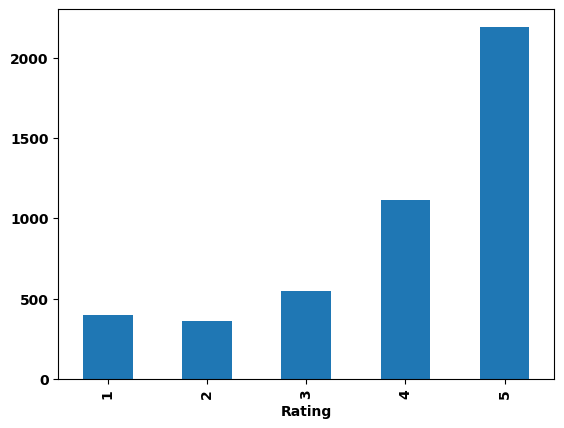

In [24]:
# Bar chart of the data with key words
keyword_df.groupby("Rating")["Rating"].count().plot(kind="bar")

In [25]:
keyword_df.describe()

,Rating,Year
count,4613.000000,4613.000000
mean,3.940169,2017.111641
std,1.295925,2.991659
min,1.000000,2005.000000
25%,3.000000,2015.000000
50%,4.000000,2017.000000
75%,5.000000,2019.000000
max,5.000000,2022.000000


### Create dataframe with no key words

In [26]:
# Dataframe with no key word data
no_keyword_index = []

for index in range(len(bagofword_df)):
    if index not in keyword_index:
        no_keyword_index.append(index)
        
no_keyword_df = df.loc[no_keyword_index, :]
no_keyword_df

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,2022-01,2022
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,2022-06,2022
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,2021-08,2021
5,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2019-05-01,I've been coming to this ice cream stand since...,2019-05,2019
6,https://www.yelp.com/biz/sidney-dairy-barn-sidney,1,2016-08-11,The soft-serve is way too sweet and has a stra...,2016-08,2016
...,...,...,...,...,...,...
19889,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-06-30,There's an endless selection of Italian food o...,2019-06,2019
19890,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-08-05,Great gelato and great milkshakes. Stopped her...,2021-08,2021
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2021-07-17,Had the chocolate cannoli! The filling was ric...,2021-07,2021
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-04-11,Its hard not to order everything when I come h...,2021-04,2021


<AxesSubplot: xlabel='Rating'>

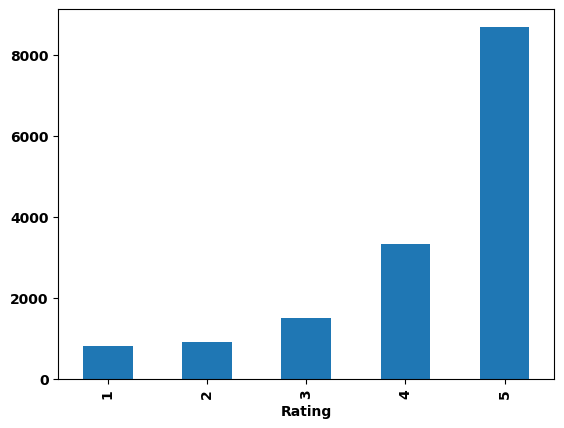

In [27]:
# Bar chart of the data with no key words
no_keyword_df.groupby("Rating")["Rating"].count().plot(kind="bar")

In [28]:
# Description of the data with no keywords
no_keyword_df.describe()

,Rating,Year
count,15283.000000,15283.000000
mean,4.188379,2017.189884
std,1.164425,3.062505
min,1.000000,2005.000000
25%,4.000000,2015.000000
50%,5.000000,2018.000000
75%,5.000000,2019.000000
max,5.000000,2022.000000


### Adding new keywords

In [29]:
# Change or add keywoeds HERE
keywords = ["receipt", "pay", "checkout", "fast", "slow", "wait", "delay", "leave", 
            "waiter", "waitress", "find", "minute", "forever", "quick", "swift", "quicker"]

new_keywords = ["payment", "bill", "cashier", "faster", "slower", "quicker", "smoothly", "left", "search", "look", 
                "second", "paid"]

In [30]:
updated_keywords = keywords + new_keywords
updated_keywords

['receipt',
 'pay',
 'checkout',
 'fast',
 'slow',
 'wait',
 'delay',
 'leave',
 'waiter',
 'waitress',
 'find',
 'minute',
 'forever',
 'quick',
 'swift',
 'quicker',
 'payment',
 'bill',
 'cashier',
 'faster',
 'slower',
 'quicker',
 'smoothly',
 'left',
 'search',
 'look',
 'second',
 'paid']

In [32]:
# Convert keywords into token

# 1. Instantiate 
bagofwords_key = CountVectorizer(tokenizer = lambda x: [stemmer.stem(i) for i in x.split(', ')], 
                             stop_words='english')

# 2. Fit 
bagofwords_key.fit(updated_keywords)

keywords_bagofword = bagofwords_key.get_feature_names()
keywords_bagofword

['cashier',
 'checkout',
 'delay',
 'fast',
 'faster',
 'forev',
 'leav',
 'left',
 'look',
 'minut',
 'paid',
 'pay',
 'payment',
 'quick',
 'quicker',
 'receipt',
 'search',
 'second',
 'slow',
 'slower',
 'smoothli',
 'swift',
 'wait',
 'waiter',
 'waitress']

In [33]:
# Check keywords which is not in the review

for word in keywords_bagofword:
    if word in review_words:
        pass
    else:
        print(word)

swift


In [34]:
# Remove keyword which is not in the review

keywords_bagofword = np.delete(keywords_bagofword, 21)

In [35]:
keywords_bagofword

array(['cashier', 'checkout', 'delay', 'fast', 'faster', 'forev', 'leav',
       'left', 'look', 'minut', 'paid', 'pay', 'payment', 'quick',
       'quicker', 'receipt', 'search', 'second', 'slow', 'slower',
       'smoothli', 'wait', 'waiter', 'waitress'], dtype='<U8')

In [36]:
keyword_index = []

for index in range(len(bagofword_df)):
    for keyword in keywords_bagofword:
        if bagofword_df.loc[index][keyword] > 0:
            if index not in keyword_index:
                keyword_index.append(index)
                
# Dataframe with key word data
keyword_df = df.loc[keyword_index, :]
keyword_df

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,2016-07,2016
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015
9,https://www.yelp.com/biz/sidney-dairy-barn-sidney,2,2019-07-26,Went here for the 1st time tonight. I ordered ...,2019-07,2019
11,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-18,Best ice cream in the area! I love their featu...,2018-05,2018
12,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-05,Delicious ice cream. Best soft serve I've ever...,2018-05,2018
...,...,...,...,...,...,...
19887,https://www.yelp.com/biz/la-pasticceria-las-vegas,1,2021-10-22,We came here looking to try wonderful desserts...,2021-10,2021
19888,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-11-08,Out of all the food kiosks that were in Eataly...,2019-11,2019
19889,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-06-30,There's an endless selection of Italian food o...,2019-06,2019
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-21,Love apricot croissant! I bought it at 4:00 PM...,2019-10,2019


In [37]:
# Dataframe with no key word data
no_keyword_index = []

for index in range(len(bagofword_df)):
    if index not in keyword_index:
        no_keyword_index.append(index)
        
no_keyword_df = df.loc[no_keyword_index, :]
no_keyword_df

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,2022-01,2022
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,2022-06,2022
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,2021-08,2021
5,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2019-05-01,I've been coming to this ice cream stand since...,2019-05,2019
6,https://www.yelp.com/biz/sidney-dairy-barn-sidney,1,2016-08-11,The soft-serve is way too sweet and has a stra...,2016-08,2016
...,...,...,...,...,...,...
19886,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2022-03-21,Delicious. We got a breakfast sandwich here an...,2022-03,2022
19890,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-08-05,Great gelato and great milkshakes. Stopped her...,2021-08,2021
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2021-07-17,Had the chocolate cannoli! The filling was ric...,2021-07,2021
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-04-11,Its hard not to order everything when I come h...,2021-04,2021


Text(0.5, 1.0, 'Data with Keywords:\nRating Distribution')

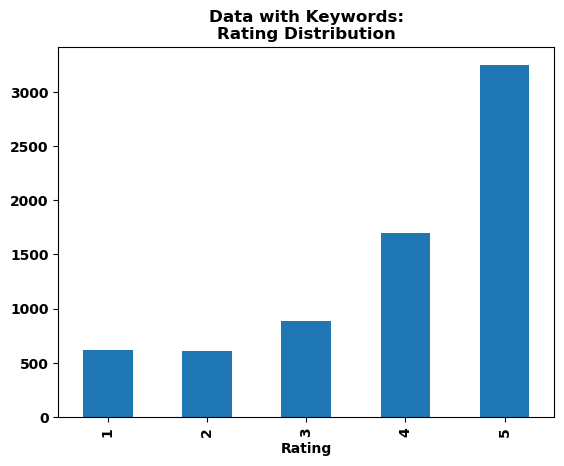

In [38]:
# Bar chart of the data with key words
keyword_df.groupby("Rating")["Rating"].count().plot(kind="bar")
plt.title("Data with Keywords:\nRating Distribution")

Text(0.5, 1.0, 'Data with no Keywords:\nRating Distribution')

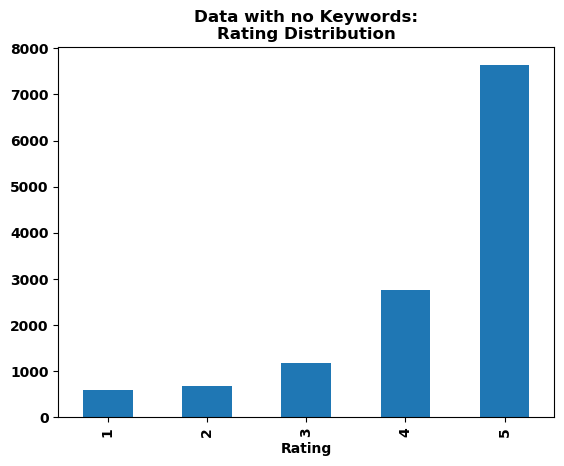

In [39]:
# Bar chart of the data with key words
no_keyword_df.groupby("Rating")["Rating"].count().plot(kind="bar")
plt.title("Data with no Keywords:\nRating Distribution")

In [40]:
# Description of the data with keywords
keyword_df.describe()

,Rating,Year
count,7058.000000,7058.000000
mean,3.898555,2017.123973
std,1.307881,2.989532
min,1.000000,2005.000000
25%,3.000000,2015.000000
50%,4.000000,2017.000000
75%,5.000000,2019.000000
max,5.000000,2022.000000


In [41]:
# Description of the data with no keywords
no_keyword_df.describe()

,Rating,Year
count,12838.000000,12838.000000
mean,4.258529,2017.198006
std,1.117222,3.076910
min,1.000000,2005.000000
25%,4.000000,2015.000000
50%,5.000000,2018.000000
75%,5.000000,2019.000000
max,5.000000,2022.000000


In [42]:
keyword_df.to_csv("keyword_df.csv", index=False)
no_keyword_df.to_csv("no_keyword_df.csv", index=False)

**Visualization**

In [43]:
keyword_df.head()

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,2016-07,2016
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015
9,https://www.yelp.com/biz/sidney-dairy-barn-sidney,2,2019-07-26,Went here for the 1st time tonight. I ordered ...,2019-07,2019
11,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-18,Best ice cream in the area! I love their featu...,2018-05,2018
12,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-05,Delicious ice cream. Best soft serve I've ever...,2018-05,2018


**Check the distribution of rating by year.**

**Data with keywords**

In [44]:
grouped_key = keyword_df.groupby(['Year', 'Rating'])["Date"].count().reset_index()
stacked_key = grouped_key.pivot(index="Year", columns="Rating", values="Date")

In [45]:
stacked_key

Rating,1,2,3,4,5
Year,,,,,
2005,NaN,NaN,NaN,1.0,NaN
2007,NaN,NaN,NaN,2.0,3.0
2008,NaN,1.0,2.0,8.0,17.0
2009,1.0,1.0,3.0,16.0,34.0
2010,2.0,3.0,13.0,51.0,40.0
2011,4.0,10.0,16.0,62.0,82.0
2012,3.0,10.0,25.0,51.0,71.0
2013,19.0,19.0,23.0,72.0,89.0
2014,68.0,81.0,109.0,159.0,185.0


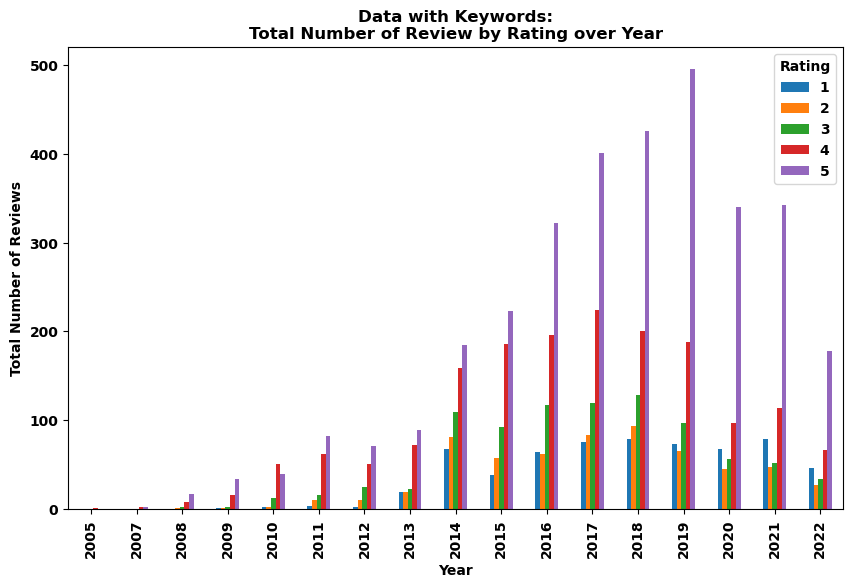

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

stacked_key.plot(kind="bar", stacked=False, ax=ax)

ax.set_xlabel("Year")
ax.set_ylabel("Total Number of Reviews")
plt.title("Data with Keywords:\nTotal Number of Review by Rating over Year")
plt.show()

**Data with NO keywords**

In [47]:
grouped_no_key = no_keyword_df.groupby(['Year', 'Rating'])["Date"].count().reset_index()
stacked_no_key = grouped_no_key.pivot(index="Year", columns="Rating", values="Date")

In [48]:
stacked_no_key

Rating,1,2,3,4,5
Year,,,,,
2005,NaN,NaN,NaN,1.0,2.0
2006,NaN,NaN,NaN,2.0,2.0
2007,NaN,NaN,2.0,7.0,11.0
2008,NaN,1.0,11.0,21.0,41.0
2009,NaN,8.0,9.0,45.0,93.0
2010,4.0,14.0,17.0,78.0,117.0
2011,NaN,16.0,28.0,105.0,144.0
2012,5.0,10.0,37.0,92.0,132.0
2013,11.0,12.0,36.0,95.0,178.0


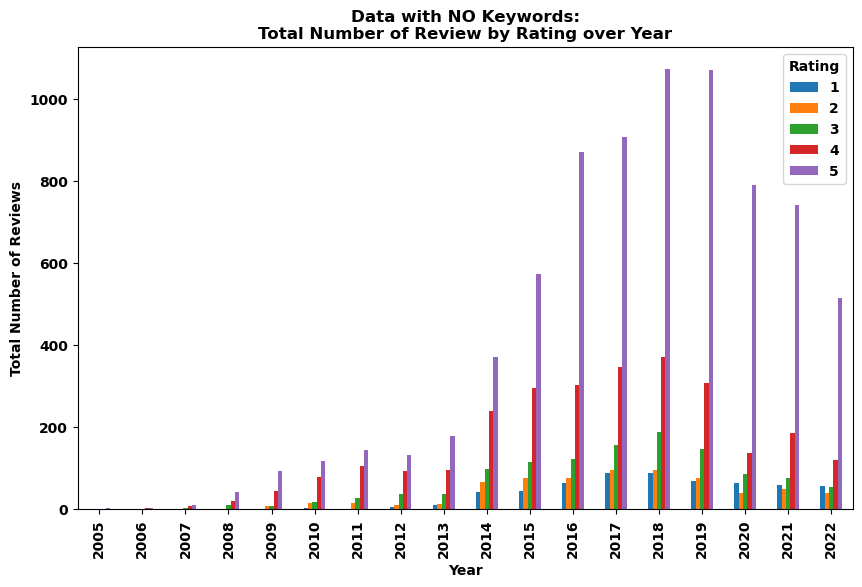

In [49]:
fig, ax = plt.subplots(figsize=(10,6))

stacked_no_key.plot(kind="bar", stacked=False, ax=ax)

ax.set_xlabel("Year")
ax.set_ylabel("Total Number of Reviews")
plt.title("Data with NO Keywords:\nTotal Number of Review by Rating over Year")
plt.show()

**Original data**

In [50]:
grouped_original = df.groupby(['Year', 'Rating'])["Date"].count().reset_index()
stacked_original = grouped_original.pivot(index="Year", columns="Rating", values="Date")

In [51]:
stacked_original

Rating,1,2,3,4,5
Year,,,,,
2005,NaN,NaN,NaN,2.0,2.0
2006,NaN,NaN,NaN,2.0,2.0
2007,NaN,NaN,2.0,9.0,14.0
2008,NaN,2.0,13.0,29.0,58.0
2009,1.0,9.0,12.0,61.0,127.0
2010,6.0,17.0,30.0,129.0,157.0
2011,4.0,26.0,44.0,167.0,226.0
2012,8.0,20.0,62.0,143.0,203.0
2013,30.0,31.0,59.0,167.0,267.0


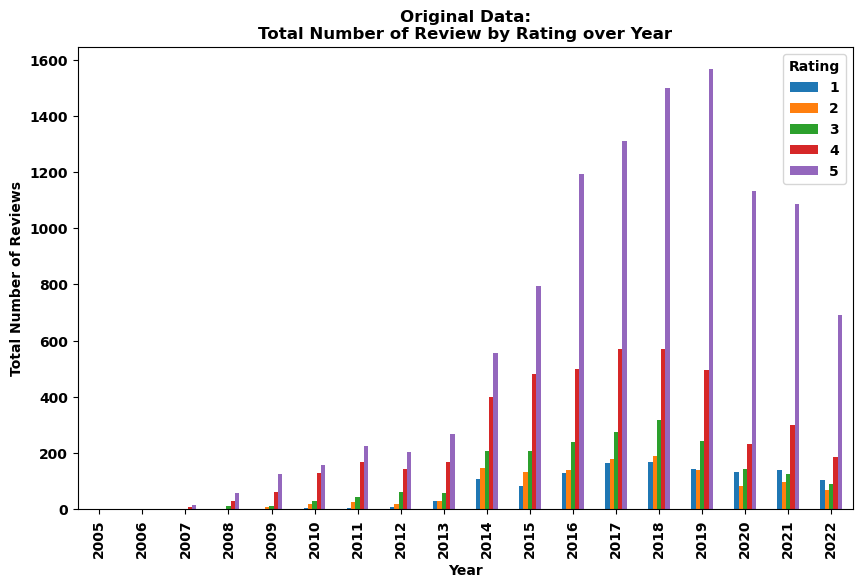

In [52]:
fig, ax = plt.subplots(figsize=(10,6))

stacked_original.plot(kind="bar", stacked=False, ax=ax)

ax.set_xlabel("Year")
ax.set_ylabel("Total Number of Reviews")
plt.title("Original Data:\nTotal Number of Review by Rating over Year")
plt.show()

**Similar Word**; Check similar words of "wait", "delay"...

In [53]:
# Change or add keywoeds HERE
keywords = ["receipt", "pay", "checkout", "fast", "slow", "wait", "delay", "leave", 
            "waiter", "waitress", "find", "minutes", "forever", "quick", "swift", "quicker"]

new_keywords = ["payment", "bill", "cashier", "faster", "slower", "quicker", "smoothly", "left", "search", "look", 
                "seconds", ]

In [54]:
import gensim

In [55]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    'D:/BrainStation2/2023_11_20 Representation Learning/lexvec-wikipedia-word-vectors', binary=False
)

In [56]:
similar = model.most_similar(positive=['quicker'], topn=50)

pd.DataFrame(similar, columns=["keywords", "Similarity"])

,keywords,Similarity
0,faster,0.808087
1,slower,0.740401
2,smoother,0.659575
3,easier,0.655794
4,swifter,0.651060
5,speedier,0.623714
6,simpler,0.601370
7,quickest,0.599733
8,harder,0.595323
9,better,0.591896


# Statistic

### Two-Sample Unpaired t-Test

In [57]:
from scipy import stats

Hypothesis Test:

<center> $H_0$: $\mu_{Mentioned Keyword} = \mu_{No Keyword} $ $\;\; vs \;\;$  $H_1$: $\mu_{Mentioned Keyword} \neq \mu_{No keyword} $ </center>

In [58]:
mentioned_keyword = np.array(keyword_df["Rating"])
no_keyword = np.array(no_keyword_df["Rating"])

In [59]:
two_sample_test = stats.ttest_ind(mentioned_keyword, no_keyword) 

print(two_sample_test)

Ttest_indResult(statistic=-20.44232580646483, pvalue=6.186396238800282e-92)


In [60]:
keyword_mean = np.mean(mentioned_keyword) 
no_keyword_mean = np.mean(no_keyword)
print(f'Mentioned Keyword Mean: {keyword_mean}')
print(f'No Keyword Mean: {no_keyword_mean}')

Mentioned Keyword Mean: 3.8985548313969964
No Keyword Mean: 4.2585293659448515


**Conclusion:** On average, customers who mentioned the speed of service or checkout in their reviews had a less positive experience at the restaurant compared to customers who didn’t mention these aspects in their reviews. With a two-sample t-test, we can reject the null hypothesis with a p-value of 6.19e-92 and conclude that there is a statistically significant difference in customer experiance between those who mentioned speed of service or checkout and those who didn’t.